𝐄𝐗𝐏𝐋𝐎𝐑𝐀𝐓𝐎𝐑𝐘 𝐃𝐀𝐓𝐀 𝐀𝐍𝐀𝐋𝐘𝐒𝐈𝐒

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
print("Imported Sucessfully.")

Imported Sucessfully.


In [2]:
# Loading The Dataset

opfd=pd.read_csv("C:/Users/deeks/Downloads/onlinefraud.csv", encoding="latin1")
print("Online Fraud Detection Data Loaded Successfully.")

Online Fraud Detection Data Loaded Successfully.


In [3]:
# Loading First Five Rows From The Dataset

opfd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Loading Last Five Rows From The Dataset

opfd.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [5]:
# Describing The Shape

opfd.shape

(1048575, 11)

In [6]:
# Information Regarding The Dataste

opfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [7]:
# Columns In The Dataser\t

opfd.columns.values

array(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'], dtype=object)

In [8]:
for i in opfd.columns:
    print(i, end=", ")

step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud, 

In [9]:
# Checking For Null Values

opfd.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# Checking For Fraud Data In Each Type

opfd[['type', 'isFraud']].value_counts()

type      isFraud
CASH_OUT  0          373063
PAYMENT   0          353873
CASH_IN   0          227130
TRANSFER  0           86189
DEBIT     0            7178
CASH_OUT  1             578
TRANSFER  1             564
Name: count, dtype: int64

In [11]:
# Dropping Nan Values

opfd = opfd.dropna()

In [12]:
print(opfd.type.value_counts())

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


In [13]:
# Distribution Of Transaction Type

pastel_colors = ['#FFB6C1', '#87CEEB', '#98FB98', '#FF69B4', '#D8BFD8']
opfd["typeId"] = opfd["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

type = opfd["type"].value_counts()
transactions = type.index
quantity = type.values

color_map = dict(zip(transactions, pastel_colors))

figure = px.pie(opfd, values=quantity, names=transactions, hole=0.5, title="Distribution of Transaction Type", color=transactions, color_discrete_map=color_map)
figure.show()

In [14]:
opfd["typeId"] = opfd["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
opfd["isFraudText"] = opfd["isFraud"].map({0: "No Fraud", 1: "Fraud"})
opfd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeId,isFraudText
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2,No Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,2,No Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,2,No Fraud


type    
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


<Axes: xlabel='type'>

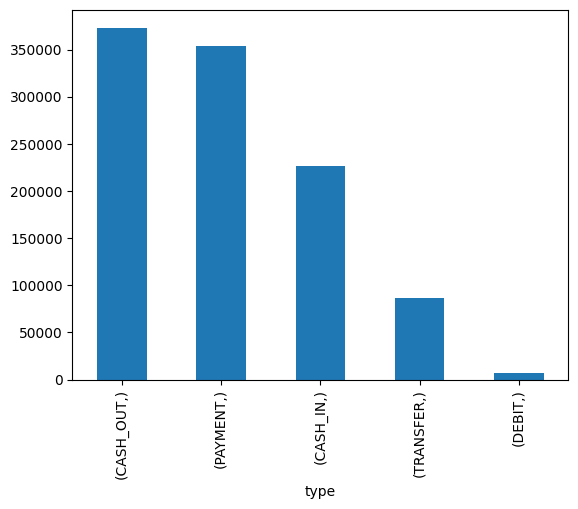

In [15]:
# View Characteristic Data

print(opfd[['type']].value_counts())
opfd[['type']].value_counts().plot(kind='bar')

isFraudText
No Fraud       1047433
Fraud             1142
Name: count, dtype: int64


<Axes: xlabel='isFraudText'>

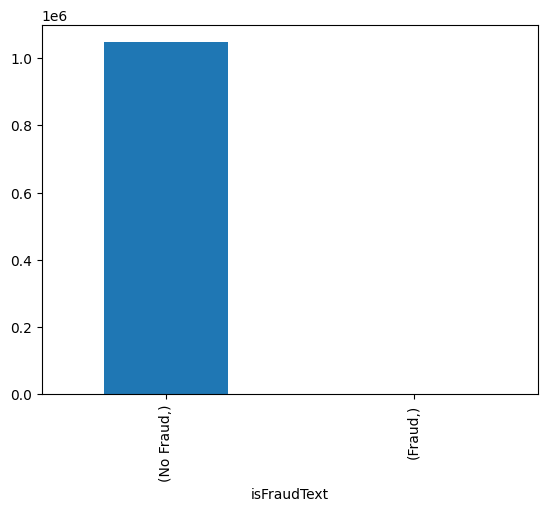

In [16]:
# View Characteristic Data, Imbalanced Data For classification task

print(opfd[['isFraudText']].value_counts())
opfd[['isFraudText']].value_counts().plot(kind='bar')

                  typeId    amount  oldbalanceOrg  newbalanceOrig  \
typeId          1.000000  0.265263       0.262623        0.272537   
amount          0.265263  1.000000       0.004864       -0.001133   
oldbalanceOrg   0.262623  0.004864       1.000000        0.999047   
newbalanceOrig  0.272537 -0.001133       0.999047        1.000000   
oldbalanceDest  0.057842  0.215558       0.093305        0.095182   
newbalanceDest  0.059061  0.311936       0.064049        0.063725   
isFraud         0.014645  0.128862       0.003829       -0.009438   

                oldbalanceDest  newbalanceDest   isFraud  
typeId                0.057842        0.059061  0.014645  
amount                0.215558        0.311936  0.128862  
oldbalanceOrg         0.093305        0.064049  0.003829  
newbalanceOrig        0.095182        0.063725 -0.009438  
oldbalanceDest        1.000000        0.978403 -0.007552  
newbalanceDest        0.978403        1.000000 -0.000495  
isFraud              -0.007552    

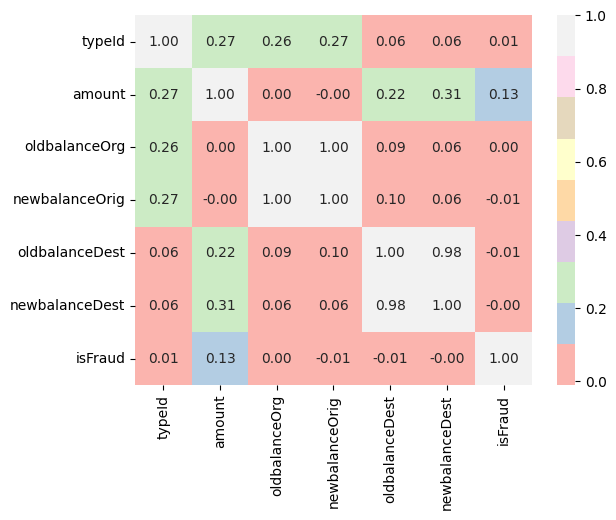

In [17]:
# Pearson Correlation Plot

data = opfd[['typeId', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]
print(data.corr())

# Plotting Correlation Heatmap

dataplot = sns.heatmap(data.corr(), fmt=".2f", cmap="Pastel1", annot=True)
plt.show()

In [18]:
categorical = ['type']
numerical_with_fe = ['amount', 'pctOrg', 'pctDest', 'transRatioDest', 'transRatioOrg']
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target='isFraud'

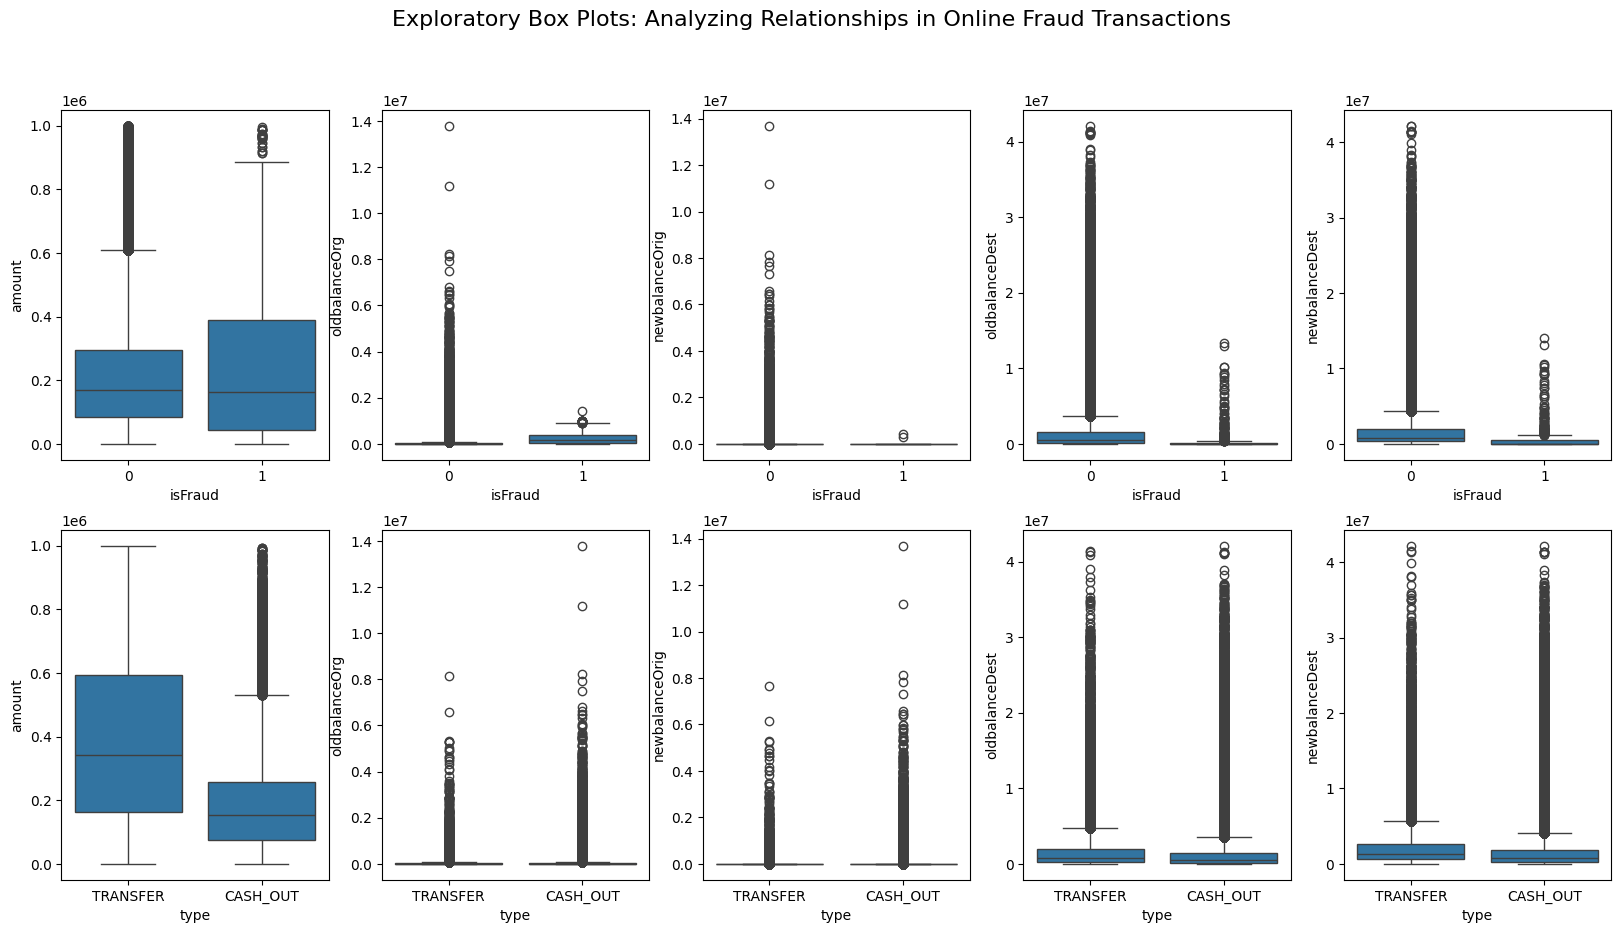

In [19]:
#Exploratory Analysis Of Online Fraud Data: Box Plots For Numerical Features VS. Transaction Type And Amount

onlinefraud_filter = opfd[(opfd['type'].isin(['CASH_OUT', 'TRANSFER'])) & (opfd['amount']<=1000000)]

fig, ax = plt.subplots(2,5, figsize=(20,10))

for i, col in enumerate(numerical):
    sns.boxplot(data = onlinefraud_filter , x= target, y=col, ax=ax[0, i])

for i, col in enumerate(numerical):
    sns.boxplot(data = onlinefraud_filter , x=categorical[0], y=col, ax=ax[1, i])

fig.suptitle("Exploratory Box Plots: Analyzing Relationships in Online Fraud Transactions", fontsize=16)

plt.show()